# Numerical Solution of Differential Equations

Differential equations are ubiquitous in science and materials science is no exception. Any time we are interested in modelling how a material or process changes in time or space, differential equations are likely to come into play. If you are lucky, the differential equations that govern the material you are interested in will have an exact solution; however, often this is not the case. When you can't find an exact solution, it is often necessary to resort to numerical methods. Many pieces of software (such as [Mathematica](https://www.wolfram.com/mathematica/)) include commands that automatically calculate numerical solutions to differential equations, but it is important to know what they are really doing behind the scenes. There is a huge number of numerical methods that can be chosen from. In this week's notebook, we will present some of the simplest methods just to give you a flavour of what other pieces of software might be doing when you ask them to solve an equation. We will illustrate these methods by solving some simple ordinary differential equations (differential equations that contain functions of only one variable), but the techniques we will consider can also be adapted to solve partial differential equations (which contain functions of more than one variable).

##### Recommended Reading

This notebook is entirely self-contained and no further reading is required; however, it was largely developed with the help of the following textbook:

_Yano et al., 2013._ [_Math, Numerics and Programming (for Mechanical Engineers)_](https://ocw.mit.edu/ans7870/2/2.086/F14/MIT2_086S13_Textbook.pdf)

You may find Section IV useful for a more in depth discussion than is given here.

## An example first order ordinary differential equation

As mentioned above, when modelling materials or materials science processes, we are often required to solve differential equations. There is a plethora of differential equations of varying complexity that you might need to solve; however, to illustrate the techniques you will learn in this notebook, we only need to consider simple examples. Here is an example of a first order ordinary differential equation:

$$\frac{du(t)}{dt}=\lambda u(t)+f(t).$$

On the left, we have the rate of change of $u$ (the function we are interested in solving for) with respect to $t$ (the independent variable) and on the right we can see that this depends upon $u$ itself, a constant $\lambda$ and some known function $f(t)$. We shall assume that this equation is subject to the initial condition

$$u(0)=u_0,$$

where $u_0$ is a known constant.

When $\lambda<0$, this equation and initial condition can be used to model heat transfer from a body with initial temperature $u_0$ into a flowing fluid of ambient temperature 0 in which it is immersed. In this case, $u(t)$ is the temperature of the body at time $t$, $\lambda$ is a constant that depends on physical quantities such as the heat transfer coefficient and the area of the body (plus others) and $f(t)$ effectively models some time-dependent heat sources within the body (see [_Yano et al., 2013_](https://ocw.mit.edu/ans7870/2/2.086/F14/MIT2_086S13_Textbook.pdf) for further details).

<figure>
<img src="Figures/ODESchematic.jpg" width='1000'>
</figure>

Additionally, this equation and initial condition can be used to model the concentration of a reactant $u(t)$ with initial concentration $u_0$ in a chemical reaction experiment as a function of time $t$, where in this case, $\lambda$ is a constant that determines the rate of the reaction and $f(t)$ is a function that represents the introduction of more reactant throughout the experiment as a function of time.

This equation can actually be solved exactly (although this can involve some quite difficult maths for some instances of $f(t)$), so numerical methods aren't strictly necessary for this equation, but it will serve as a nice example to introduce them with.

## Numerical Methods 

### Finite differencing

In the methods we introduce below, we will need to use finite differencing. Finite differencing can be used to approximate derivatives in order to solve differential equations numerically.

#### Forward differencing

You may recall this definition of the derivative from previous maths modules:

$$f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}.$$

If instead of letting $h\rightarrow 0$, we let $h$ be a small but finite number, we have a reasonable numerical approximation of the derivative:

$$f'(x)\approx\frac{f(x+h)-f(x)}{h}.$$

This approximation is called a forward difference (because this definition of $f'(x)$ depends upon the value of $f$ at $x$, as well as the value of $f$ at a point forward of $x$, i.e. $x+h$).

Let's consider a simple example. If we let $f(x)=\sin(x)$, then we can approximate the derivative by the forward difference

$$f'(x)\approx\frac{\sin(x+h)-\sin(x)}{h}.$$

Let's try defining this approximation in Python and comparing the approximation to the true value of the derivative (which we know to be $f'(x)=\cos(x)$):

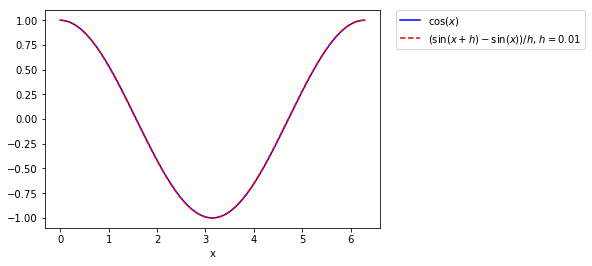

In [1]:
import numpy as np #import numpy package as np
import matplotlib.pyplot as plt #import pyplot from matplotlib as plt
def ForwardSin(x,h): #ForwardSin is a function of x and h
    return (np.sin(x+h)-np.sin(x))/h
x=np.linspace(0,2*np.pi,501) #define a set of input values
%matplotlib inline 
#define where plots will appear
plt.plot(x,np.cos(x),'-b', label="$\cos(x)$") #plot f'(x)=cos(x)
plt.plot(x,ForwardSin(x,0.01),'--r', label="$(\sin(x+h)-\sin(x))/h$, $h=0.01$") #plot f'(x)=(f(x+h)-f(x))/h
plt.xlabel('x') #label horizontal axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

As you can see, the approximation is very good. This is because we chose a very small value for $h$ (i.e. $h=0.01$). If $h$ is too big, the approximation will not be so good:

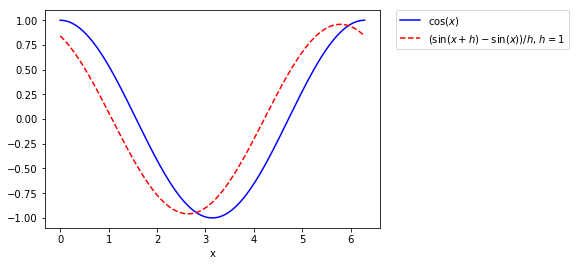

In [2]:
plt.plot(x,np.cos(x),'-b', label="$\cos(x)$") #plot f'(x)=cos(x)
plt.plot(x,ForwardSin(x,1),'--r', label="$(\sin(x+h)-\sin(x))/h$, $h=1$") #plot f'(x)=(f(x+h)-f(x))/h
plt.xlabel('x') #label horizontal axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

#### <span style="color: red"> Task 1:</span> Plot a forward difference approximation to the derivative of $f(x)=x^2$.

Compare the approximation with the exact solution $f'(x)=2x$.

Investigate what happens as you vary the size of $h$.

The figure you obtain should look something like this:
<figure>
<img src="Figures/04_T1.jpeg" width='400'>
</figure>

#### Backward differencing

An equivalent definition of the derivative to that presented above is:

$$f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h}.$$

Again, if instead of letting $h\rightarrow 0$, we let $h$ be a small but finite number, we have a different numerical approximation of the derivative:

$$f'(x)\approx\frac{f(x)-f(x-h)}{h}.$$

This approximation is called a backward difference (because this definition of $f'(x)$ depends upon the value of $f$ at $x$, as well as the value of $f$ at a point backward of $x$, i.e. $x-h$).

Let's take a look at a backward difference approximation of the derivative of $\sin(x)$:

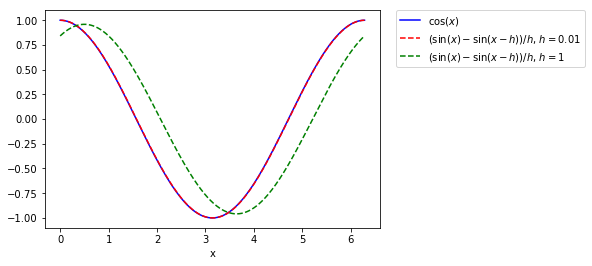

In [4]:
def BackwardSin(x,h): #ForwardSin is a function of x and h
    return (np.sin(x)-np.sin(x-h))/h
plt.plot(x,np.cos(x),'-b', label="$\cos(x)$") #plot f'(x)=cos(x)
plt.plot(x,BackwardSin(x,0.01),'--r', label="$(\sin(x)-\sin(x-h))/h$, $h=0.01$") #plot f'(x)=(f(x)-f(x-h))/h
plt.plot(x,BackwardSin(x,1),'--g', label="$(\sin(x)-\sin(x-h))/h$, $h=1$") #plot f'(x)=(f(x)-f(x-h))/h
plt.xlabel('x') #label horizontal axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

Again, if $h$ is small enough, the approximation is very good. If $h$ is too large, there is a signficant error.

#### <span style="color: red"> Task 2:</span> Plot a backward difference approximation to the derivative of $f(x)=x^3$.

Compare the approximation with the exact solution $f'(x)=3x^2$.

Investigate what happens as you vary the size of $h$.

The figure you obtain should look something like this:
<figure>
<img src="Figures/04_T2.jpeg" width='400'>
</figure>

#### Central differencing

The final definition of the derivative we shall consider is:

$$f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h/2)-f(x-h/2)}{h}.$$

Once again, if instead of letting $h\rightarrow 0$, we let $h$ be a small but finite number, we have a different numerical approximation of the derivative:

$$f'(x)\approx\frac{f(x+h/2)-f(x-h/2)}{h}.$$

This approximation is called a central difference (because this definition of $f'(x)$ depends upon the value of $f$ forward and backward of $x$ and so is centred on $x$).

Let's take a look at a central difference approximation of the derivative of $\sin(x)$:

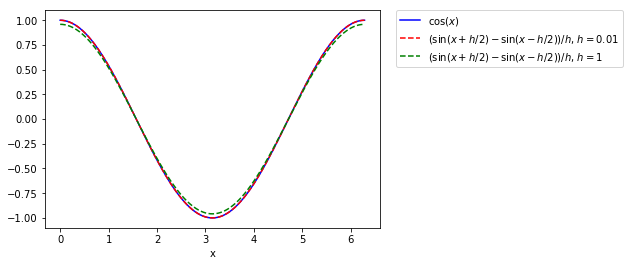

In [6]:
def CentralSin(x,h): #CentralSin is a function of x and h
    return (np.sin(x+h/2)-np.sin(x-h/2))/h
plt.plot(x,np.cos(x),'-b', label="$\cos(x)$") #plot f'(x)=cos(x)
plt.plot(x,CentralSin(x,0.01),'--r', label="$(\sin(x+h/2)-\sin(x-h/2))/h$, $h=0.01$") #plot f'(x)=(f(x+h/2)-f(x-h/2))/h
plt.plot(x,CentralSin(x,1),'--g', label="$(\sin(x+h/2)-\sin(x-h/2))/h$, $h=1$") #plot f'(x)=(f(x+h/2)-f(x-h/2))/h
plt.xlabel('x') #label horizontal axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

Note that the error is much smaller for $h=1$ this time. This is because central differencing converges to the exact solution as $h$ tends to zero faster than forward or backward differencing.

#### <span style="color: red"> Task 3:</span> Plot a central difference approximation to the derivative of $f(x)=\exp(-3x)$.

Compare the approximation with the exact solution $f'(x)=-3\exp(-3x)$.

Investigate what happens as you vary the size of $h$.

The figure you obtain should look something like this:
<figure>
<img src="Figures/04_T3.jpeg" width='400'>
</figure>

### Euler methods

#### The Euler Backward method

The Euler Backward method (named after Swiss scientist [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler)) is a technique for solving ordinary differential equations with a given initial condition. Now we have discussed finite differencing, we can return to the first order differential equation introduced above and solve it using the Euler Backward method. First, let's remind ourselves of the equation and initial condition:

$$\frac{du(t)}{dt}=\lambda u(t)+f(t),\hspace{0.5cm}u(0)=u_0.$$

Let's say we are interested in solving this equation over a fixed range of time, e.g. from $t=0$ to $t=10$. The first step of the Euler Backward method is to divide this time domain up into $N$ equal segments of size $h$. We can then label each time point as follows:

$$t^j=j h,\hspace{0.5cm}j=0,1,2,...,N,$$

so that $t^0=0$, $t^1=h$, $t^2=2h$, ... $t^N=Nh$ (see the figure below).

<figure>
<img src="Figures/discretised_time.png" width='800'>
</figure>

Then at each time-point, we can label the value of the function we wish to solve for, $u$, as follows:

$$u^j=u(t^j),\hspace{0.5cm}j=0,1,2,...,N.$$

The next step is to rewrite the derivative as a backward difference (which is why the method is called the Euler _Backward_ method):

$$\left.\frac{du}{dt}\right|_{t=t^j}\approx\frac{u^j-u^{j-1}}{h},\hspace{0.5cm}j=1,2,...,N.$$

Upon making this approximation, we can rewrite our differential equation as a difference equation:

$$\frac{u^j-u^{j-1}}{h}=\lambda u^j+f(t^j).$$

We can then implement this equation in Python and work out the value of $u$ at each time step by using a <code>for</code> loop. We shall consider the case when $u_0=1$, $\lambda=0.1$ and $f(t)=\sin(t)$. We can rearrange the above equation as follows to make the implementation easier:

$$u^j=\frac{u^{j-1}+hf(t^j)}{1-\lambda h}$$

This equation tells us how the solution $u^j$ at time-step $t^j$ depends upon the solution $u^{j-1}$ at the previous time-step $t^{j-1}$ and the value of the function $f(t)$ at the current time-step. Therefore, if we want to calculate the solution at the first time-step after the initial condition $t^1$, we let $j=1$ to obtain this equation:

$$u^1=\frac{u^{0}+hf(t^1)}{1-\lambda h}$$

We know the numerical values of all the quantities on the right hand-side, therefore the solution at $t=t^1$ is straightforward to determine. In the example we mentioned above with $u^0=u_0=1$, $\lambda=0.1$ and $f(t)=\sin(t)$, we would have:

$$u^1=\frac{1+h\sin(h)}{1-0.1h}$$

and so, if we choose to discretise our time-domain ($t=0$ to $t=10$) into 1000 steps ($N=1000\Rightarrow h=10/1000=0.01$), we obtain

$$u^1=\frac{1+0.01\sin(0.01)}{1-0.1\times0.01}\approx1.0011$$

which then gives us enough information to calculate the value of $u(t)$ at the next time point $t^2$ and so on (by letting $j=2,3,4...,N$). Here is the implementation in Python:

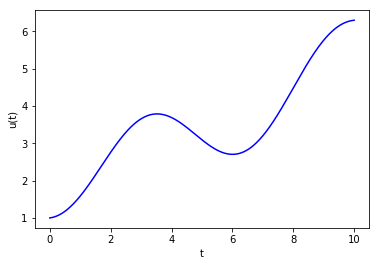

In [8]:
u=[1] #set initial value for u. 
#u is a list of values that initially has length 1, but which will get longer at each step in the for loop
t0=0 #set initial time point
tN=10 #set final time point
N=1000 #set number of sections to divide time domain into
h=(tN-t0)/N #calculate the width of each section

t=np.linspace(t0,tN,N+1) #set up an array of input time values
T=np.linspace(t0+h,tN,N) #set up an array of time values excluding t=0

for tj in T:
    u.append((u[-1]+h*np.sin(tj))/(1-0.1*h)) #for each time step, calculate the value of u
    
plt.plot(t,u,'-b') #plot u
plt.xlabel('t') #label horizontal axis
plt.ylabel('u(t)'); #label vertical axis

The exact solution when $u_0=1$, $\lambda=0.1$ and $f(t)=\sin(t)$ is

$$u(t)=\frac{1}{101}(201e^{0.1t}-100\cos(t)-10\sin(t)).$$

We can use this to check whether our numerical solution worked:

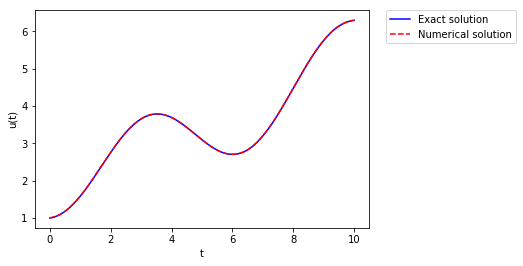

In [9]:
plt.plot(t,(201*np.exp(0.1*t)-100*np.cos(t)-10*np.sin(t))/101,'-b', label="Exact solution") #plot exact solution
plt.plot(t,u,'--r', label="Numerical solution") #plot numerical solution
plt.xlabel('t') #label horizontal axis
plt.ylabel('u(t)') #label vertical axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

As we can see, the numerical solution is very good. Note that, as was the case for finite differencing, if we choose $h$ to be too big (by choosing $N$ to be too small) the approximation won't be as good:

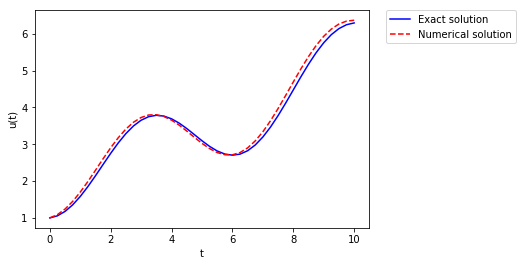

In [10]:
u=[1] #set initial value for u
t0=0 #set initial time point
tN=10 #set final time point
N=40 #set number of sections to divide time domain into
h=(tN-t0)/N #calculate the width of each section

t=np.linspace(t0,tN,N+1) #set up an array of input time values
T=np.linspace(t0+h,tN,N) #set up an array of time values excluding t=0

for tj in T:
    u.append((u[-1]+h*np.sin(tj))/(1-0.1*h)) #for each time step, calculate the value of u
    
plt.plot(t,(201*np.exp(0.1*t)-100*np.cos(t)-10*np.sin(t))/101,'-b', label="Exact solution") #plot exact solution
plt.plot(t,u,'--r', label="Numerical solution") #plot numerical solution
plt.xlabel('t') #label horizontal axis
plt.ylabel('u(t)') #label vertical axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

#### <span style="color: red"> Task 4:</span> Use the Euler Backward method to solve the differential equation

$$\frac{du(t)}{dt}=\lambda u(t)+f(t),\hspace{0.5cm}u(0)=u_0.$$

from $t=0$ to $t=5$, with $u_0=2$, $\lambda=-5$ and $f(t)=0.5t^3-5t^2+10t$.

Compare the calculated numerical solution to the exact solution 

$$u(t)=\frac{3106e^{-5t}+125t^3-1325t^2+3030t-606}{1250}$$

The figure you obtain should look like this:
<figure>
<img src="Figures/04_T4.jpeg" width='400'>
</figure>

#### The Euler Forward method

The Euler Forward method is an alternative technique for solving ordinary differential equations numerically. The method is very similar to the Euler Backward method, but instead of using a backward difference for the definition of the derivative, it uses a forward difference:

$$\left.\frac{du}{dt}\right|_{t=t^j}\approx\frac{u^{j+1}-u^j}{h},\hspace{0.5cm}j=1,2,...,N.$$

Upon making this approximation, we can rewrite our differential equation as a slightly different difference equation:

$$\frac{u^{j+1}-u^{j}}{h}=\lambda u^j+f(t^j).$$

In order to use the same indexing scheme as the Euler Backward method, we can rewrite this equation by relabelling $j$ as $j-1$:

$$\frac{u^{j}-u^{j-1}}{h}=\lambda u^{j-1}+f(t^{j-1}).$$

Note that this difference equation is different to that obtained using the Euler Backward Method. We can also implement this equation in Python. Again, we shall again consider the case when $u_0=1$, $\lambda=0.1$ and $f(t)=\sin(t)$. We can rearrange the above equation as follows to make the implementation easier:

$$u^{j}=(\lambda h+1)u^{j-1}+h~f(t^{j-1}).$$

Again, if we want to calculate $u^1$, we need to let $j=1$ to obtain:

$$u^{1}=(\lambda h+1)u^0+h~f(t^0).$$

Then we can calculate the solution at remaining time-points iteratively, by letting $j=2,3,4,...,N$. Here is the Python implementation:

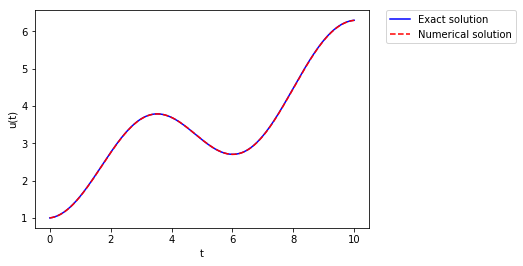

In [12]:
uF=[1] #set initial value for u
t0F=0 #set initial time point
tNF=10 #set final time point
NF=1000 #set number of sections to divide time domain into
hF=(tNF-t0F)/NF #calculate the width of each section

tF=np.linspace(t0F,tNF,NF+1) #set up an array of input time values
TF=np.linspace(t0F,tNF-hF,NF) #set up an array of time values excluding t=10

for tj in TF:
    uF.append((0.1*hF+1)*uF[-1]+hF*np.sin(tj)) #for each time step, calculate the value of u
    
plt.plot(tF,(201*np.exp(0.1*tF)-100*np.cos(tF)-10*np.sin(tF))/101,'-b', label="Exact solution") #plot exact solution
plt.plot(tF,uF,'--r', label="Numerical solution") #plot numerical solution
plt.xlabel('t') #label horizontal axis
plt.ylabel('u(t)') #label vertical axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

#### <span style="color: red"> Task 5:</span> Use the Euler Forward method to solve the differential equation

$$\frac{du(t)}{dt}=\lambda u(t)+f(t),\hspace{0.5cm}u(0)=u_0.$$

from $t=0$ to $t=5$, with $u_0=2$, $\lambda=-5$ and $f(t)=0.5t^3-5t^2+10t$.

Compare the calculated numerical solution to the exact solution 

$$u(t)=\frac{3106^{-5t}+125t^3-1325t^2+3030t-606}{1250}$$

The figure you obtain should look like this:
<figure>
<img src="Figures/04_T5.jpeg" width='400'>
</figure>

#### <span style="color: red"> Task 6:</span> Use the Euler Forward method to solve a different differential equation

Solve this equation using the Euler Forward method:

$$\frac{du(t)}{dt}=\lambda(u(t))^2$$

from $t=0$ to $t=5$, with $u_0=2$ and $\lambda=-5$.

To do this, you will first need to calculate the required difference equation.

Compare your numerical solution to the exact solution

$$u(t)=\frac{2}{1+10t}.$$

The figure you obtain should look like this:
<figure>
<img src="Figures/04_T6.jpeg" width='400'>
</figure>

### Implicit vs Explicit Methods

Let's take a look at the difference equations we obtained from the two Euler methods.

Backward:

$$\frac{u^j-u^{j-1}}{h}=\lambda u^j+f(t^j).$$

Forward:

$$\frac{u^{j}-u^{j-1}}{h}=\lambda u^{j-1}+f(t^{j-1}).$$

The Euler Backward method is an implicit method, because $u^j$ (i.e. the solution we are seeking) appears on the right side of the equation as well as the left side. The Euler Forward method is an explicit method because $u^j$ only appears on the left. This difference in structure means that the backward method requires us to perform a division operation at each time-step:

$$u^j=\frac{u^{j-1}+hf(t^j)}{1-\lambda h}$$

whereas the forward method only requires multiplication:

$$u^{j}=(\lambda h+1)u^{j-1}+h~f(t^{j-1}).$$

Often, these methods are used not just to solve single differential equations, but to solve systems of very large numbers of equations. It transpires that it is more computationally expensive to carry out the division operation for large systems of equations, so in this case it is often better to use explicit methods. Sometimes, however, the equations have properties that make implicit methods more useful. One situation in which this is the case is when you are required to solve stiff equations. Stiff equations are equations for which there is a very large difference in the orders of magnitude of the parameters. Let's return to our example ordinary differential equation:

$$\frac{du(t)}{dt}=\lambda u(t)+f(t).$$

Let's say we had $\lambda=-100$ and $f(x)=\cos(\omega t)$ with $\omega=4$. In this case there is a factor of 25 in difference between the two parameters $\lambda$ and $\omega$, therefore the equation can be described as stiff. Let's take a look at using the Euler Backward and Euler Forward methods to solve this equation over the time-range $t=0$ to $t=1$ subject to the initial condition $u(0)=0$. We will compare the numerical solutions in each case to the analytical solution:

$$u(t)=\frac{25\cos(4t)+\sin(4t)-25e^{-100t}}{2504}.$$

For large $N$, both methods work well:

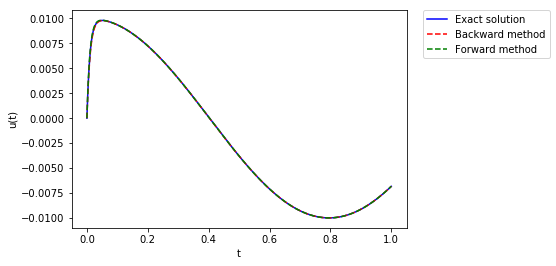

In [15]:
#Backward method:
u=[0] #set initial value for u
t0=0 #set initial time point
tN=1 #set final time point
N=1000 #set number of sections to divide time domain into
h=(tN-t0)/N #calculate the width of each section
t=np.linspace(t0,tN,N+1) #set up an array of input time values
T=np.linspace(t0+h,tN,N) #set up an array of time values excluding t=0
for tj in T:
    u.append((u[-1]+h*np.cos(4*tj))/(1+100*h)) #for each time step, calculate the value of u
    
#Forward method:
uF=[0] #set initial value for u
t0F=0 #set initial time point
tNF=1 #set final time point
NF=1000 #set number of sections to divide time domain into
hF=(tNF-t0F)/NF #calculate the width of each section
tF=np.linspace(t0F,tNF,NF+1) #set up an array of input time values
TF=np.linspace(t0F,tNF-hF,NF) #set up an array of time values excluding t=10
for tj in TF:
    uF.append((-100*hF+1)*uF[-1]+hF*np.cos(4*tj)) #for each time step, calculate the value of u

t2=np.linspace(t0,tN,1000) #set up an array of input time values for exact solution
plt.plot(t2,(25*np.cos(4*t2)+np.sin(4*t2)-25*np.exp(-100*t2))/2504,'-b', label="Exact solution") #plot exact solution
plt.plot(t,u,'--r', label="Backward method") #plot backward method numerical solution
plt.plot(tF,uF,'--g', label="Forward method") #plot forward method numerical solution
plt.xlabel('t') #label horizontal axis
plt.ylabel('u(t)') #label vertical axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

For moderate $N$, the backward method shows a clear advantage: 

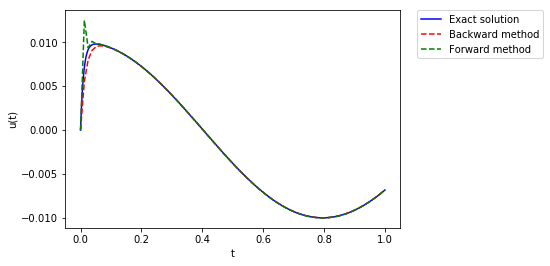

In [16]:
#Backward method:
u=[0] #set initial value for u
t0=0 #set initial time point
tN=1 #set final time point
N=80 #set number of sections to divide time domain into
h=(tN-t0)/N #calculate the width of each section
t=np.linspace(t0,tN,N+1) #set up an array of input time values
T=np.linspace(t0+h,tN,N) #set up an array of time values excluding t=0
for tj in T:
    u.append((u[-1]+h*np.cos(4*tj))/(1+100*h)) #for each time step, calculate the value of u
    
#Forward method:
uF=[0] #set initial value for u
t0F=0 #set initial time point
tNF=1 #set final time point
NF=80 #set number of sections to divide time domain into
hF=(tNF-t0F)/NF #calculate the width of each section
tF=np.linspace(t0F,tNF,NF+1) #set up an array of input time values
TF=np.linspace(t0F,tNF-hF,NF) #set up an array of time values excluding t=10
for tj in TF:
    uF.append((-100*hF+1)*uF[-1]+hF*np.cos(4*tj)) #for each time step, calculate the value of u

t2=np.linspace(t0,tN,1000) #set up an array of input time values for exact solution
plt.plot(t2,(25*np.cos(4*t2)+np.sin(4*t2)-25*np.exp(-100*t2))/2504,'-b', label="Exact solution") #plot exact solution
plt.plot(t,u,'--r', label="Backward method") #plot backward method numerical solution
plt.plot(tF,uF,'--g', label="Forward method") #plot forward method numerical solution
plt.xlabel('t') #label horizontal axis
plt.ylabel('u(t)') #label vertical axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

And for small $N$ the forward method is very erratic:

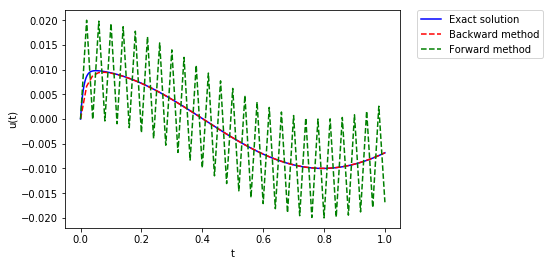

In [17]:
#Backward method:
u=[0] #set initial value for u
t0=0 #set initial time point
tN=1 #set final time point
N=50 #set number of sections to divide time domain into
h=(tN-t0)/N #calculate the width of each section
t=np.linspace(t0,tN,N+1) #set up an array of input time values
T=np.linspace(t0+h,tN,N) #set up an array of time values excluding t=0
for tj in T:
    u.append((u[-1]+h*np.cos(4*tj))/(1+100*h)) #for each time step, calculate the value of u
    
#Forward method:
uF=[0] #set initial value for u
t0F=0 #set initial time point
tNF=1 #set final time point
NF=50 #set number of sections to divide time domain into
hF=(tNF-t0F)/NF #calculate the width of each section
tF=np.linspace(t0F,tNF,NF+1) #set up an array of input time values
TF=np.linspace(t0F,tNF-hF,NF) #set up an array of time values excluding t=10
for tj in TF:
    uF.append((-100*hF+1)*uF[-1]+hF*np.cos(4*tj)) #for each time step, calculate the value of u

t2=np.linspace(t0,tN,1000) #set up an array of input time values for exact solution
plt.plot(t2,(25*np.cos(4*t2)+np.sin(4*t2)-25*np.exp(-100*t2))/2504,'-b', label="Exact solution") #plot exact solution
plt.plot(t,u,'--r', label="Backward method") #plot backward method numerical solution
plt.plot(tF,uF,'--g', label="Forward method") #plot forward method numerical solution
plt.xlabel('t') #label horizontal axis
plt.ylabel('u(t)') #label vertical axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

Therefore, in summary, you should use implicit methods to solve stiff equations quickly as you can get away with using a smaller number of time-steps and explicit methods only when you need to solve large numbers of non-stiff equations.

### Solving higher order ordinary differential equations

So far this week, we have focussed on first order ordinary differential equations (in which the highest derivative is of order 1); however, most of the differential equations with materials science applications are more complicated than this. As an example, let us consider Poisson's equation:

$$\frac{d^2u(x)}{dx^2}=f(x),$$

where $f(x)$ is a given function. Poisson's equation is a second order (the highest order derivative that appears is of order 2) ordinary differential equation that can be used to model steady diffusion processes such as temperature diffusion through a metal rod. In this case, $u(x)$ would represent the temperature of the rod at position $x$, which we would like to determine by solving the equation, and $f(x)$ would represent some given heat sources distributed along the length of the rod.

<figure>
<img src="Figures/ODESchematic2.jpg" width='1000'>
</figure>

Poisson's equation can also be used to model problems in electrostatics. In this case, $u(x)$ would represent the scalar electric field at position $x$ and $f(x)$ would take the form: $f(x)=-\rho(x)/\epsilon$, where $\rho(x)$ is the free charge volume density of the material under consideration and $\epsilon$ is its permitivity.

For simple choices of $f(x)$, Poisson's equation can be solved analytically. For example, if $f(x)=6x$, we have

$$\frac{d^2u(x)}{dx^2}=6x\implies u(x)=x^3+Ax+B,$$

where $A$ and $B$ are constants. To determine the values of $A$ and $B$, we need to apply some initial (or boundary [we will discuss these next week]) conditions:

$$u(0)=u_0,~u'(0)=v_0,$$

which in the first example mentioned above would tell us the temperature and spatial rate of change of temperature at one end of the rod. If we let $u_0=1$ and $v_0=2$, for example, we would have

$$u(0)=1\implies A=1$$
$$u'(0)=2\implies B=2$$
$$\implies u(x)=x^3+2x+1$$

For more complex versions of $f(x)$, however, it is not always easy to find an analytical solution. In cases such as these, numerical technqiues such as those we introduced above become essential. Above, we used the Euler methods to solve first order ordinary differential equations. This was straightforward as we were able to directly substitute a first order derivative for a backward or forward difference. We do not have a difference equation for a second order derivative, therefore, to solve a second (or higher) order ordinary differential equation, we need to be a bit more clever.

The approach we use is to introduce a new variable $v$ defined such that

$$u'(x)=v(x),$$

which allows us to rewrite Poisson's equation as

$$v'(x)=f(x),$$

and the second initial condition as

$$v(0)=v_0.$$

Therefore, we have converted our second order differential equation into two coupled first order differential equations, which can now be solved using the Euler methods, as above. Below, we use the Euler Backward method to solve Poisson's equation.

#### The Euler Backward method

As above, we first discretise the domain we wish to solve over (although this time we are discretising space instead of time):

$$x^j=j h,\hspace{0.5cm}j=0,1,2,...,N,$$

so that $x^0=0$, $x^1=h$, $x^2=2h$, ... $x^N=Nh$.

Then at each space-point, we can label the values of the functions we wish to solve for ($u$ and $v$) as follows:

$$u^j=u(x^j),\hspace{0.5cm}j=0,1,2,...,N,$$
$$v^j=u(v^j),\hspace{0.5cm}j=0,1,2,...,N.$$

The next step is to rewrite the derivatives as a backward differences to give us

$$\frac{u^j-u^{j-1}}{h}=v^j,$$
$$\frac{v^j-v^{j-1}}{h}=f(x^j).$$

These equations can then be rearranged as follows:

$$u^j=u^{j-1}+hv^j,$$
$$v^j=v^{j-1}+hf(x^j).$$

Note that the equation for $u$ at $x^j$ depends on the value of $v$ at $x^j$, therefore we need to solve the second equation first at each step to determine $v^j$ before substituting this value into the first equation.

Let's implement these equations in Python from $x=0$ to $x=10$ with $f(x)=6x$ (as above) and subject to boundary conditions mentioned above ($u(0)=1,$ $u'(0)=2$) and compare our numerical solution to the exact solution:

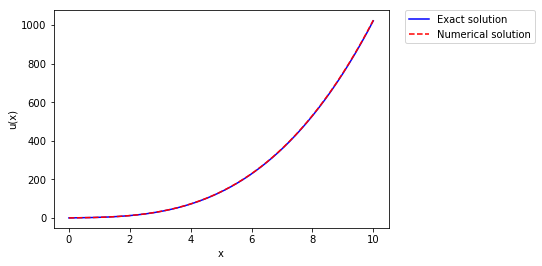

In [18]:
u=[1] #set initial value for u. u is a list of values that initially has length 1, but which will get longer at each step in the for loop
v=[2] #set initial value for v. v is a list of values that initially has length 1, but which will get longer at each step in the for loop
x0=0 #set initial space point
xN=10 #set final space point
N=1000 #set number of sections to divide spatial domain into
h=(xN-x0)/N #calculate the width of each section

x=np.linspace(x0,xN,N+1) #set up an array of input space values
X=np.linspace(x0+h,xN,N) #set up an array of time values excluding x=0

for xj in X:
    v.append(v[-1]+h*6*xj) #for each step, calculate the value of v. Note: it is important we do this first.
    u.append(u[-1]+h*v[-1]) #for each step, calculate the value of u
    
plt.plot(x,x**3+2*x+1,'-b', label="Exact solution") #plot exact solution
plt.plot(x,u,'--r', label="Numerical solution") #plot numerical solution
plt.xlabel('x') #label horizontal axis
plt.ylabel('u(x)') #label vertical axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

As an aside, it is now very easy to plot the derivative of $u$ and compare to the exact solution

$$u'(x)=3x^2+2$$

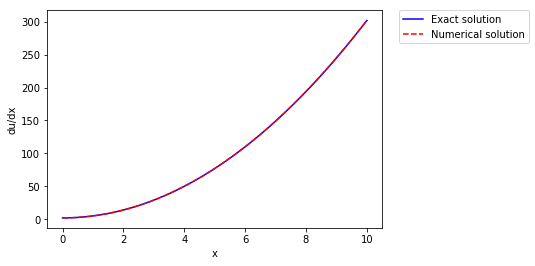

In [19]:
plt.plot(x,3*x**2+2,'-b', label="Exact solution") #plot exact solution
plt.plot(x,v,'--r', label="Numerical solution") #plot numerical solution
plt.xlabel('x') #label horizontal axis
plt.ylabel('du/dx') #label vertical axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

#### <span style="color: red"> Task 7:</span> Solve the above problem using the Euler Forward method

You will first need to work out the difference equations you need to solve.

Compare your numerical solution to the exact solution.

The figure you obtain should look like this:
<figure>
<img src="Figures/04_T7.jpeg" width='400'>
</figure>

#### <span style="color: red"> Task 8:</span> Compare your numerical solution for the derivative to the exact solution

The figure you obtain should look like this:
<figure>
<img src="Figures/04_T8.jpeg" width='400'>
</figure>

#### <span style="color: red"> Task 9:</span> Solve a different second order differential equation using the Euler Backward method

Solve this equation:
    
$$\frac{d^2u(x)}{dx^2}+\frac{du}{dx}=f(x),$$

with $f(x)=\sin(x)$ subject to the boundary condtions $$u(0)=1~u'(0)=2.$$

You will first need to work out the difference equations you need to solve.

Compare your numerical solution to the exact solution

$$u(x)=-\frac{1}{2}(5e^{-x}-8+\cos(x)+\sin(x)).$$

Compare your numerical solution for the derivative to the exact solution

$$u'(x)=\frac{1}{2}(5e^{-x}+\sin(x)-\cos(x)).$$

The figures you obtain should look like this:
<figure>
<img src="Figures/04_T9_a.jpeg" width='400'>
<img src="Figures/04_T9_b.jpeg" width='400'>
</figure>

#### <span style="color: red"> Task 10:</span> Solve the same differential equation using the Euler Forward method


Compare your numerical solution to the exact solution.

Compare your numerical solution for the derivative to the exact solution.

The figures you obtain should look like this:
<figure>
<img src="Figures/04_T10_a.jpeg" width='400'>
<img src="Figures/04_T10_b.jpeg" width='400'>
</figure>